# GuestEnv Scenario Tests

This notebook runs the GuestEnv environment in five different scenarios. Each scenario logs phonemes per agent and rewards, then plots the results.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=200, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

## Scenario 1: Baseline
No guest actions are taken.

In [3]:
env = GuestEnv(max_steps=200)
actions = [0]*200
ph, rw = run_env(env, actions)

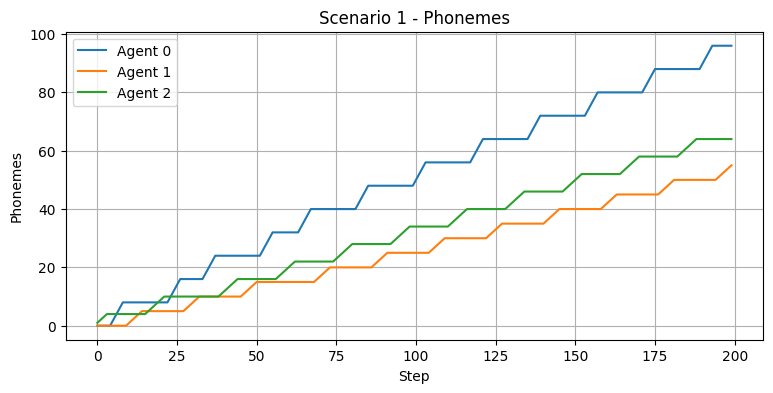

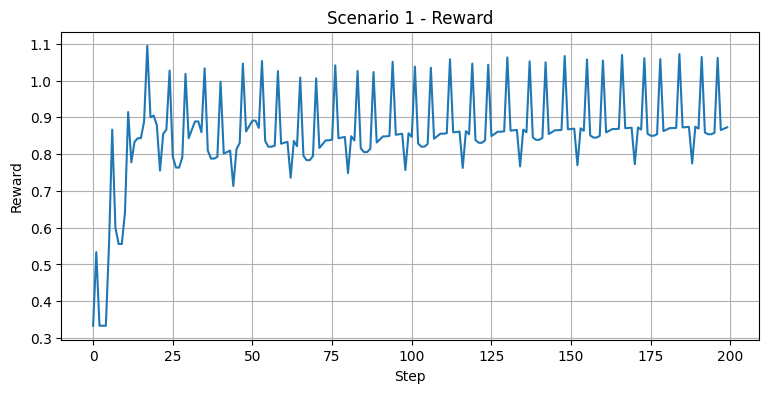

In [4]:
plot_results(ph, rw, 'Scenario 1')

## Scenario 2: Encourage Agent 0

In [5]:
env = GuestEnv(max_steps=200)
actions = [5]*200
ph, rw = run_env(env, actions)

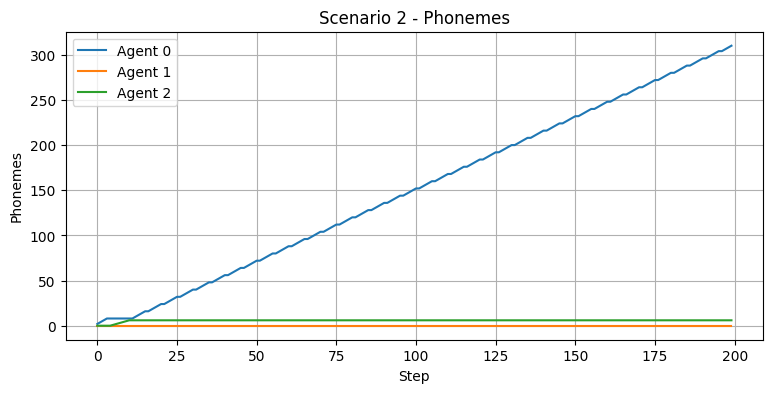

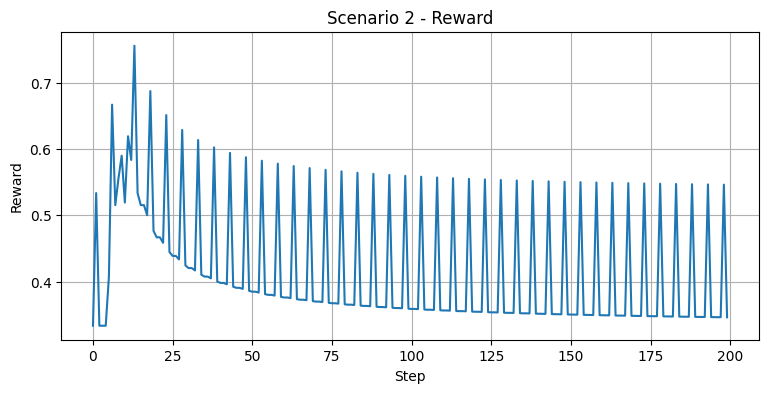

In [6]:
plot_results(ph, rw, 'Scenario 2')

## Scenario 3: Encourage Agent 1

In [7]:
env = GuestEnv(max_steps=200)
actions = [6]*200
ph, rw = run_env(env, actions)

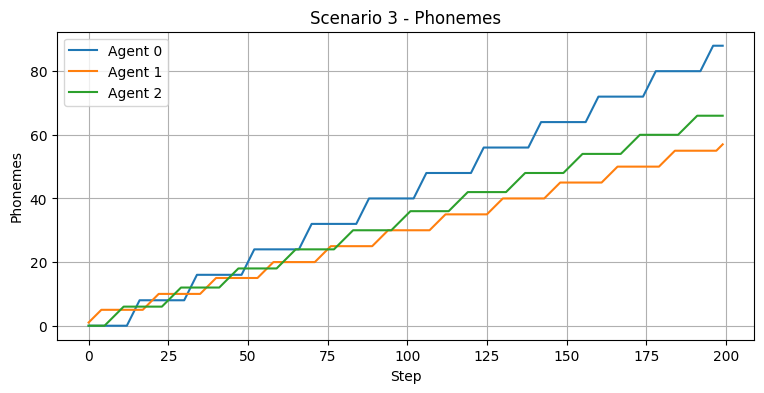

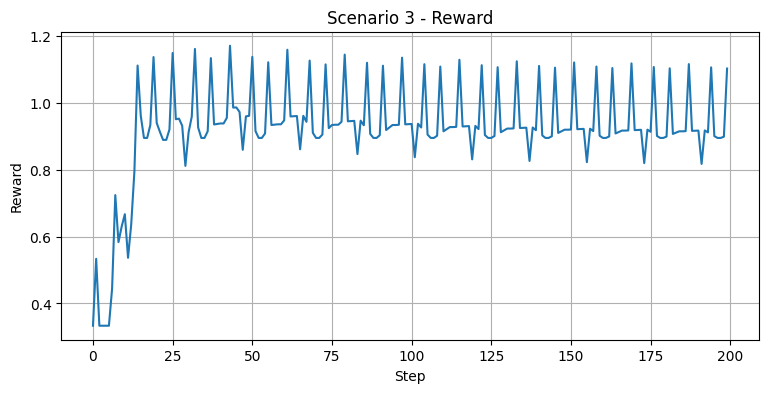

In [8]:
plot_results(ph, rw, 'Scenario 3')

## Scenario 4: Encourage Agent 2

In [9]:
env = GuestEnv(max_steps=200)
actions = [7]*200
ph, rw = run_env(env, actions)

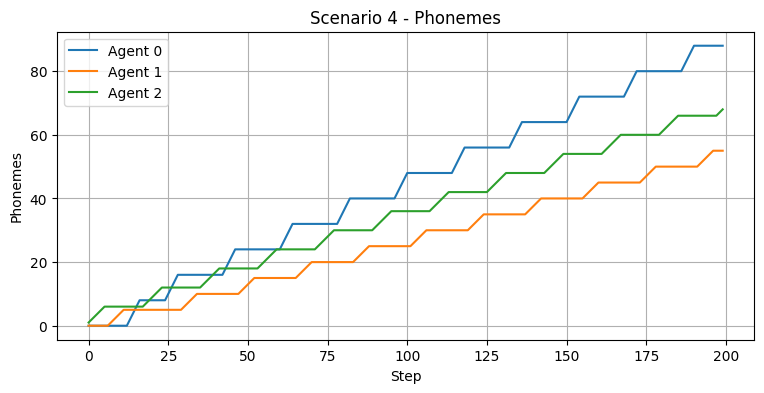

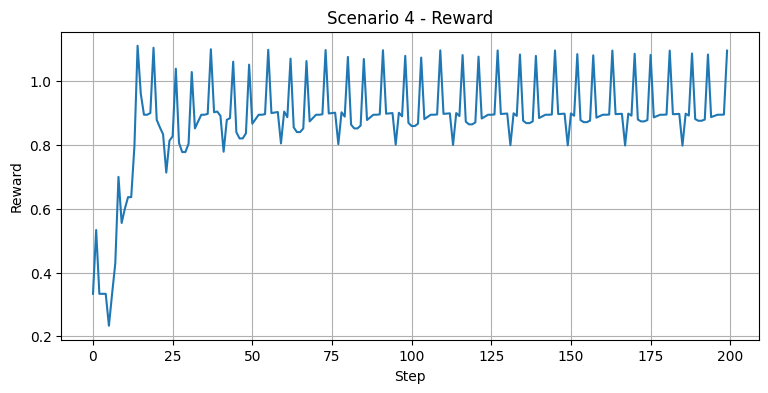

In [10]:
plot_results(ph, rw, 'Scenario 4')

## Scenario 5: Alternating Encouragement with High Imbalance

ACTIONS = {
    0: "wait",
    1: "stop",
    2: "stare_at 0",
    3: "stare_at 1",
    4: "stare_at 2",
    5: "encourage 0",
    6: "encourage 1",
    7: "encourage 2",
}

In [11]:
env = GuestEnv(max_steps=200, imbalance_factor=0.8, energy_imbalance=0.8)
actions = ([5]*50) + ([6]*50) + ([7]*50) + ([1]*50)
ph, rw = run_env(env, actions)

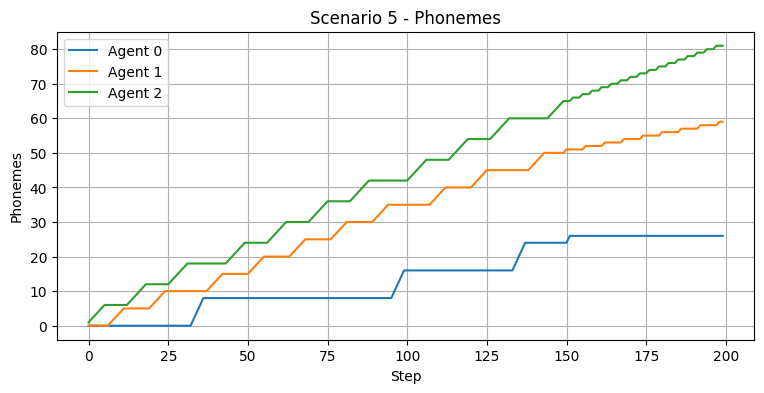

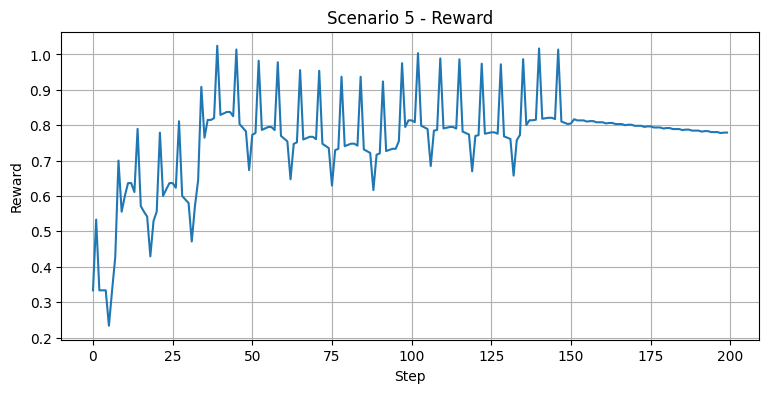

In [12]:
plot_results(ph, rw, 'Scenario 5')